<a href="https://colab.research.google.com/github/Hasithadissanayaka/FOT-MT-ETM4272/blob/main/b5_tha3_443.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install supervision and ultralytics on google colab

In [ ]:
# Uninstall the packages
!pip uninstall -y supervision ultralytics

# Remove the package folders (optional, but recommended)
!rm -rf /usr/local/lib/python3.10/dist-packages/supervision
!rm -rf /usr/local/lib/python3.10/dist-packages/ultralytics

# Reinstall the packages
!pip install supervision ultralytics

# Import the packages
import supervision as sv
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
from google.colab.patches import cv2_imshow



Found existing installation: supervision 0.25.1
Uninstalling supervision-0.25.1:
  Successfully uninstalled supervision-0.25.1
  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
  Using cached ultralytics-8.3.73-py3-none-any.whl.metadata (35 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.me

In [ ]:
# Load the segmentation model
model = YOLO("yolov8s-seg.pt")  # Load the segmentation model, ensure you have the segmentation model

# Read the image
image_path = "/content/drive/MyDrive/Colab Notebooks/cars1.jpg"  # Change this to your image file
image = cv2.imread(image_path)

# Run segmentation on the image
results = model(image)[0]

largest_area =
largest_index = -1


100%|██████████| 22.8M/22.8M [00:00<00:00, 26.9MB/s]



0: 416x640 14 cars, 815.4ms
Speed: 16.8ms preprocess, 815.4ms inference, 72.7ms postprocess per image at shape (1, 3, 416, 640)


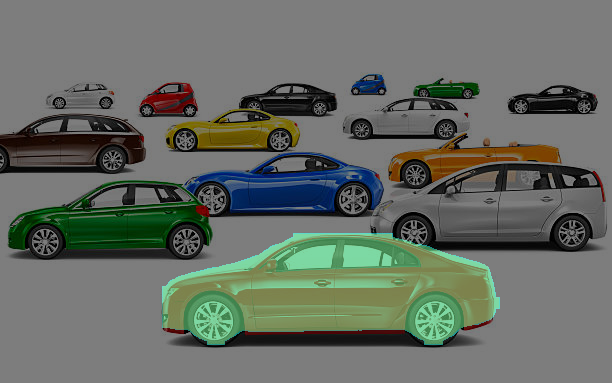

In [ ]:
 # Iterate through detected objects
for i, (box, mask) in enumerate(zip(results.boxes.xyxy, results.masks.data)):
    x1, y1, x2, y2 = box
    area = (x2 - x1) * (y2 - y1)

    if area > largest_area:
        largest_area = area
        largest_index = i

# Draw the largest mask if a car is detected
if largest_index != -1:
    mask = results.masks.data[largest_index].cpu().numpy()  # Convert mask to NumPy array
    mask = (mask * 255).astype(np.uint8)  # Convert to 8-bit grayscale

    # Resize the mask to match the image size
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Create an RGB mask with a custom color (Change the color as needed)
    color = (255, 255, 0)  # Green mask in (B, G, R) format
    rgb_mask = np.zeros_like(image, dtype=np.uint8)  # Create an empty RGB image
    rgb_mask[mask > 0] = color  # Apply the chosen color where the mask is non-zero

    # Overlay the mask on the original image
    image = cv2.addWeighted(image, 0.7, rgb_mask, 0.3, 0)  # Blend images

# Display the result using cv2_imshow() from google.colab.patches
cv2_imshow(image)  # Use cv2_imshow to display the image


3.1.2 Draw the Segmentation Mask of the Largest Car: Using Ultralytics + Supervision Libraries

In [ ]:
# Load the segmentation model
model = YOLO('yolov8s-seg.pt')  # Load the segmentation model

# Read the image
image_path = "/content/drive/MyDrive/Colab Notebooks/cars1.jpg"  # Change this to your image file
image = cv2.imread(image_path)

In [ ]:
# Run segmentation on the image
results = model(image)[0]

# Transfer Ultralytics results to Supervision
detections = sv.Detections.from_ultralytics(results)


0: 416x640 14 cars, 640.4ms
Speed: 10.8ms preprocess, 640.4ms inference, 61.6ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
largest_mask = None
largest_area = 0

# Iterate through the masks & find the largest
for mask in detections.mask:
    area = mask.sum()  # Calculate the area of the mask
    if area > largest_area:
        largest_area = area
        largest_mask = mask

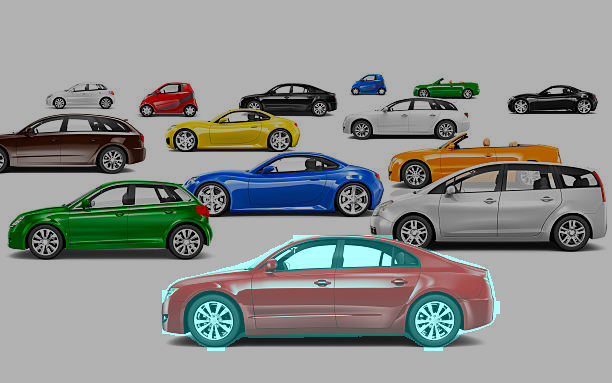

In [ ]:
# Display the largest mask if found
if largest_mask is not None:
    # Resize the mask to match the image size
    resized_mask = cv2.resize(largest_mask.astype(np.uint8), (image.shape[1], image.shape[0]))

    # Create an RGB mask with a custom color (Change the color as needed)
    color = (255, 255, 0)  # Green mask in (B, G, R) format
    rgb_mask = np.zeros_like(image, dtype=np.uint8)  # Create an empty RGB image
    rgb_mask[resized_mask > 0] = color  # Apply the chosen color where the mask is non-zero

    # Overlay the mask on the original image
    image = cv2.addWeighted(image, 0.7, rgb_mask, 0.3, 0)  # Blend images

    # Display the result using cv2_imshow() from google.colab.patches
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)  # Use cv2_imshow to display the image